## Hate Content Detection

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import dataset
data = pd.read_csv("labeled_data.csv")
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
data.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
Unnamed: 0            24783 non-null int64
count                 24783 non-null int64
hate_speech           24783 non-null int64
offensive_language    24783 non-null int64
neither               24783 non-null int64
class                 24783 non-null int64
tweet                 24783 non-null object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [7]:
#check correlation
data.corr()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
Unnamed: 0,1.000000,0.023947,-0.054345,0.043773,-0.005187,0.024525
count,0.023947,1.000000,0.101926,0.534604,0.063326,-0.010029
hate_speech,-0.054345,0.101926,1.000000,-0.261808,-0.157599,-0.515732
offensive_language,0.043773,0.534604,-0.261808,1.000000,-0.684406,-0.410440
neither,-0.005187,0.063326,-0.157599,-0.684406,1.000000,0.800687
class,0.024525,-0.010029,-0.515732,-0.410440,0.800687,1.000000


In [15]:
#inplace = apply changes in original dataset
data.rename(columns={'Unnamed: 0' : 'index'}, inplace=True)
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [20]:
#Removing unnecessary ! from tweets
data["tweet"] = data.tweet.str.replace("!", "")
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,RT @mayasolovely: As a woman you shouldn't co...
1,1,3,0,3,0,1,RT @mleew17: boy dats cold...tyga dwn bad for...
2,2,3,0,3,0,1,RT @UrKindOfBrand Dawg RT @80sbaby4life: You ...
3,3,3,0,2,1,1,RT @C_G_Anderson: @viva_based she look like a...
4,4,6,0,6,0,1,RT @ShenikaRoberts: The shit you hear about m...


In [29]:
# add tweet length column
data['tweet_length'] = data['tweet'].apply(len)
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet,tweet_length
0,0,3,0,0,3,2,RT @mayasolovely: As a woman you shouldn't co...,137
1,1,3,0,3,0,1,RT @mleew17: boy dats cold...tyga dwn bad for...,78
2,2,3,0,3,0,1,RT @UrKindOfBrand Dawg RT @80sbaby4life: You ...,109
3,3,3,0,2,1,1,RT @C_G_Anderson: @viva_based she look like a...,53
4,4,6,0,6,0,1,RT @ShenikaRoberts: The shit you hear about m...,124


## Basic Data visualizations

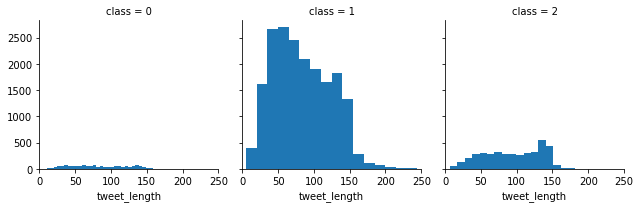

In [36]:
#FacetGrid
graph = sns.FacetGrid(data=data, col='class')
plt.xlim([0, 250])
graph.map(plt.hist, 'tweet_length', bins=50)

<p> Number of tweets seem to be skewed a lot higher towards the class=1 (offensive language)

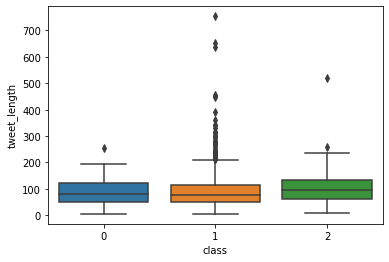

In [37]:
#Box-plot visvualization
sns.boxplot(x='class', y='tweet_length', data=data)

<p>class-1 tweets have much longer text. There are also outliers present so text-length won’t be a useful feature to consider.

([<matplotlib.axis.XTick at 0x212fc10ccc8>,
 <a list of 3 Text xticklabel objects>)

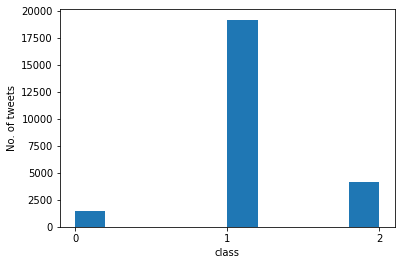

In [48]:
#histogram

class_min = data['class'].min()
class_max = data['class'].max()
data['class'].astype(str) # Prevents conversion to float
data['class'].hist()
plt.grid(False)
plt.xlabel('class')
plt.ylabel('No. of tweets')
plt.xticks(range(class_min, class_max + 1, 1))

<p> The above histogram shows that most of the tweets are considered to be offensive words by the CF coders.